# College Club Swimming National Qualifying Times Prediction Model
This notebook takes a dictionary input of {Year : NQT String} and returns a plot that predicts the NQTs for the next two years for each event.

In [8]:
"""
Historical NQTs for each event
"""

# Men's Events
men_50_free = {2019: "23.89", 2020: "23.59", 2022: "23.29", 2023: "23.09", 2024: "22.89"}
men_100_free = {2019: "53.59", 2020: "52.89", 2022: "51.79", 2023: "51.09", 2024: "49.99"}
men_200_free = {2019: "1:57.99", 2020: "1:56.89", 2022: "1:55.89", 2023: "1:54.59", 2024: "1:53.99"}
men_500_free = {2019: "5:21.89", 2020: "5:20.09", 2022: "5:16.59", 2023: "5:10.79", 2024: "5:10.49"}
men_50_back = {2019: "29.69", 2020: "28.89", 2022: "28.39", 2023: "27.79", 2024: "27.29"}
men_100_back = {2019: "1:01.39", 2020: "1:00.89", 2022: "1:00.29", 2023: "59.29", 2024: "58.89"}
men_200_back = {2019: "2:14.99", 2020: "2:12.99", 2022: "2:12.39", 2023: "2:08.99", 2024: "2:07.99"}
men_50_breast = {2019: "31.59", 2020: "31.39", 2022: "30.69", 2023: "30.09", 2024: "29.29"}
men_100_breast = {2019: "1:09.19", 2020: "1:08.09", 2022: "1:07.29", 2023: "1:05.99", 2024: "1:04.19"}
men_200_breast = {2019: "2:32.49", 2020: "2:29.09", 2022: "2:27.49", 2023: "2:24.89", 2024: "2:24.09"}
men_50_fly = {2019: "26.49", 2020: "25.99", 2022: "25.49", 2023: "25.19", 2024: "25.09"}
men_100_fly = {2019: "58.89", 2020: "58.39", 2022: "57.89", 2023: "56.99", 2024: "56.19"}
men_200_fly = {2019: "2:13.79", 2020: "2:12.09", 2022: "2:10.89", 2023: "2:07.99", 2024: "2:07.49"}
men_100_im = {2019: "1:02.09", 2020: "1:01.19", 2022: "1:00.29", 2023: "59.29", 2024: "58.09"}
men_200_im = {2019: "2:14.59", 2020: "2:14.29", 2022: "2:13.39", 2023: "2:11.39", 2024: "2:09.99"}
men_400_im = {2019: "4:51.99", 2020: "4:50.99", 2022: "4:47.79", 2023: "4:39.99", 2024: "4:39.49"}

# Women's Events
women_50_free = {2019: "27.89", 2020: "27.69", 2022: "27.39", 2023: "27.09", 2024: "26.69"}
women_100_free = {2019: "1:03.79", 2020: "1:02.69", 2022: "1:00.99", 2023: "59.99", 2024: "58.69"}
women_200_free = {2019: "2:19.59", 2020: "2:18.39", 2022: "2:17.29", 2023: "2:15.69", 2024: "2:11.59"}
women_500_free = {2019: "5:54.99", 2020: "5:53.49", 2022: "5:51.39", 2023: "5:45.19", 2024: "5:44.79"}
women_50_back = {2019: "33.29", 2020: "32.99", 2022: "32.69", 2023: "32.09", 2024: "30.89"}
women_100_back = {2019: "1:12.39", 2020: "1:11.49", 2022: "1:10.69", 2023: "1:09.19", 2024: "1:07.09"}
women_200_back = {2019: "2:28.89", 2020: "2:28.19", 2022: "2:26.69", 2023: "2:24.59", 2024: "2:23.99"}
women_50_breast = {2019: "37.29", 2020: "37.09", 2022: "36.49", 2023: "35.99", 2024: "35.69"}
women_100_breast = {2019: "1:21.59", 2020: "1:20.69", 2022: "1:20.29", 2023: "1:18.99", 2024: "1:17.19"}
women_200_breast = {2019: "2:52.49", 2020: "2:51.49", 2022: "2:50.39", 2023: "2:47.89", 2024: "2:46.99"}
women_50_fly = {2019: "31.19", 2020: "30.49", 2022: "29.99", 2023: "29.49", 2024: "29.19"}
women_100_fly = {2019: "1:09.79", 2020: "1:08.49", 2022: "1:07.69", 2023: "1:06.49", 2024: "1:06.39"}
women_200_fly = {2019: "2:34.09", 2020: "2:33.59", 2022: "2:32.19", 2023: "2:31.09", 2024: "2:30.99"}
women_100_im = {2019: "1:11.29", 2020: "1:10.79", 2022: "1:10.09", 2023: "1:09.09", 2024: "1:07.49"}
women_200_im = {2019: "2:34.99", 2020: "2:33.79", 2022: "2:33.09", 2023: "2:31.09", 2024: "2:29.49"}
women_400_im = {2019: "5:46.99", 2020: "5:45.99", 2022: "5:44.39", 2023: "5:42.29", 2024: "5:39.99"}


In [9]:
def time_to_seconds(time_str):
    """
    Convert a time string in "MM:SS.MS" or "SS.MS" format to seconds.
    """
    if ':' in time_str:  # Format "MM:SS.MS"
        minutes, rest = time_str.split(':')
        seconds, milliseconds = rest.split('.')
        total_seconds = int(minutes) * 60 + int(seconds) + float(f"0.{milliseconds}")
    else:  # Format "SS.MS"
        seconds, milliseconds = time_str.split('.')
        total_seconds = int(seconds) + float(f"0.{milliseconds}")

    return total_seconds


In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

def predict_and_plot(event_name, men_times_dict, women_times_dict):
    """
    Predict qualifying times for the next two years using linear regression for both men and women,
    and plot them side by side.
    """
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Create 1 row, 2 columns of subplots
    
    for idx, (gender, times_dict) in enumerate([('Men', men_times_dict), ('Women', women_times_dict)]):
        # Extract years and times, converting times to seconds
        years = np.array(list(times_dict.keys())).reshape(-1, 1)
        times_seconds = np.array([time_to_seconds(times_dict[year]) for year in times_dict])

        # Fit the linear regression model
        model = LinearRegression()
        model.fit(years, times_seconds)

        # Predict for the next two years
        max_year = years.max()
        future_years = np.array([[max_year + 1], [max_year + 2]])
        predictions = model.predict(future_years)

        # Plotting for each subplot
        ax = axes[idx]
        ax.plot(years, times_seconds, 'o-', color='blue', label='Historical Times')
        ax.plot(np.concatenate([years[-1:], future_years]), np.concatenate([times_seconds[-1:], predictions]), 's--', color='red', label='Predicted Times')
        ax.scatter(years, times_seconds, color='blue')
        ax.scatter(future_years, predictions, color='red')
        for i, year in enumerate(np.concatenate([years.flatten(), future_years.flatten()])):
            times_all = np.concatenate([times_seconds, predictions])
            ax.text(year, times_all[i], f"{seconds_to_time(times_all[i])}", ha='right', va='bottom')

        ax.set_title(f'{event_name} - {gender}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Time (seconds)')
        ax.legend()
        ax.grid(True)

    plt.show()


def seconds_to_time(seconds):
    """
    Convert seconds to a string format "MM:SS.MS" or "SS.MS".
    """
    m, s = divmod(seconds, 60)
    ms = round((s - int(s)) * 100)
    if m > 0:
        return f"{int(m):02d}:{int(s):02d}.{ms:02d}"
    else:
        return f"{int(s):02d}.{ms:02d}"


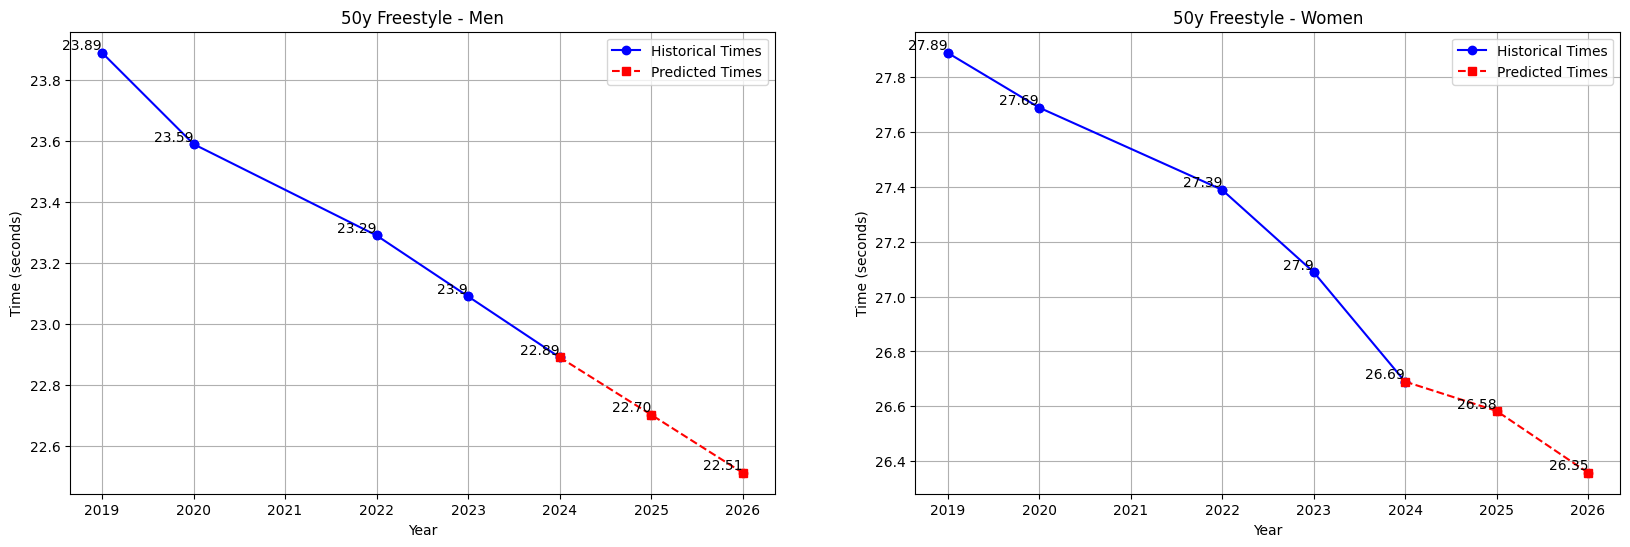

In [17]:
event_name = "50y Freestyle"
predicted_times_dict = predict_and_plot(event_name, men_50_free, women_50_free)


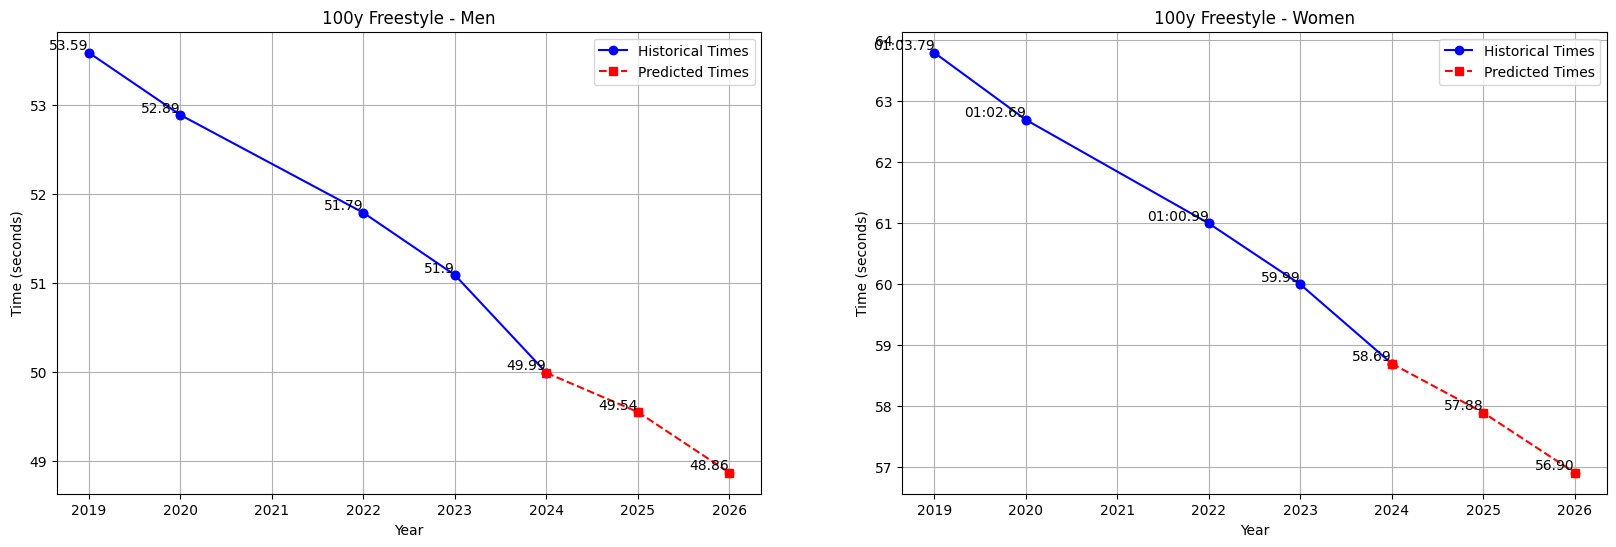

In [18]:
event_name = "100y Freestyle"
predicted_times_dict = predict_and_plot(event_name, men_100_free, women_100_free)

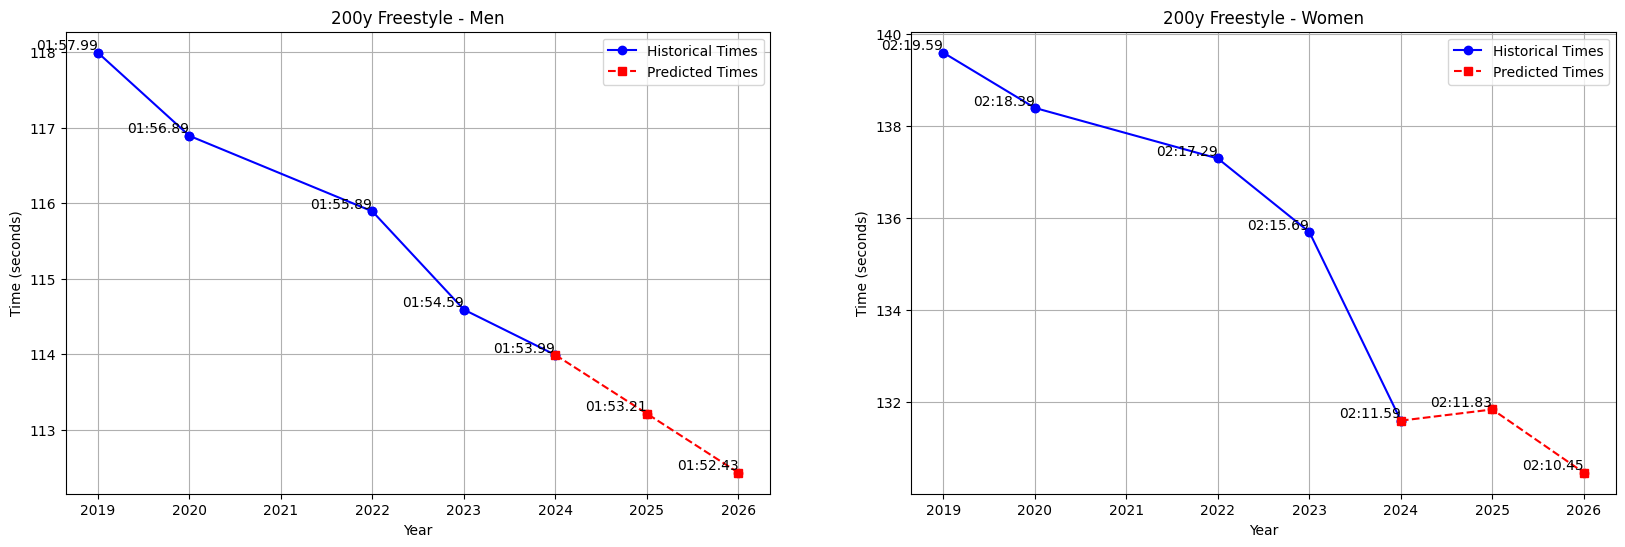

In [19]:
# Women Maybe inaccurate
event_name = "200y Freestyle"
predicted_times_dict = predict_and_plot(event_name, men_200_free, women_200_free)

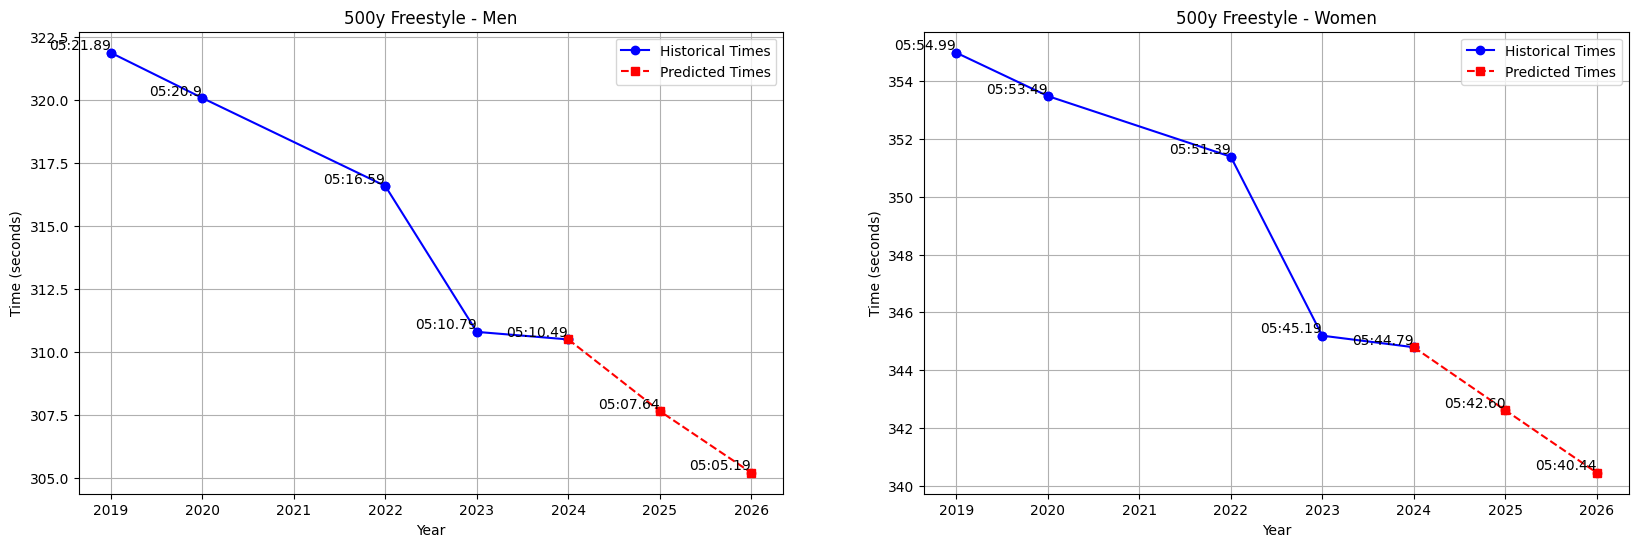

In [20]:
# Women Maybe inaccurate
event_name = "500y Freestyle"
predicted_times_dict = predict_and_plot(event_name, men_500_free, women_500_free)

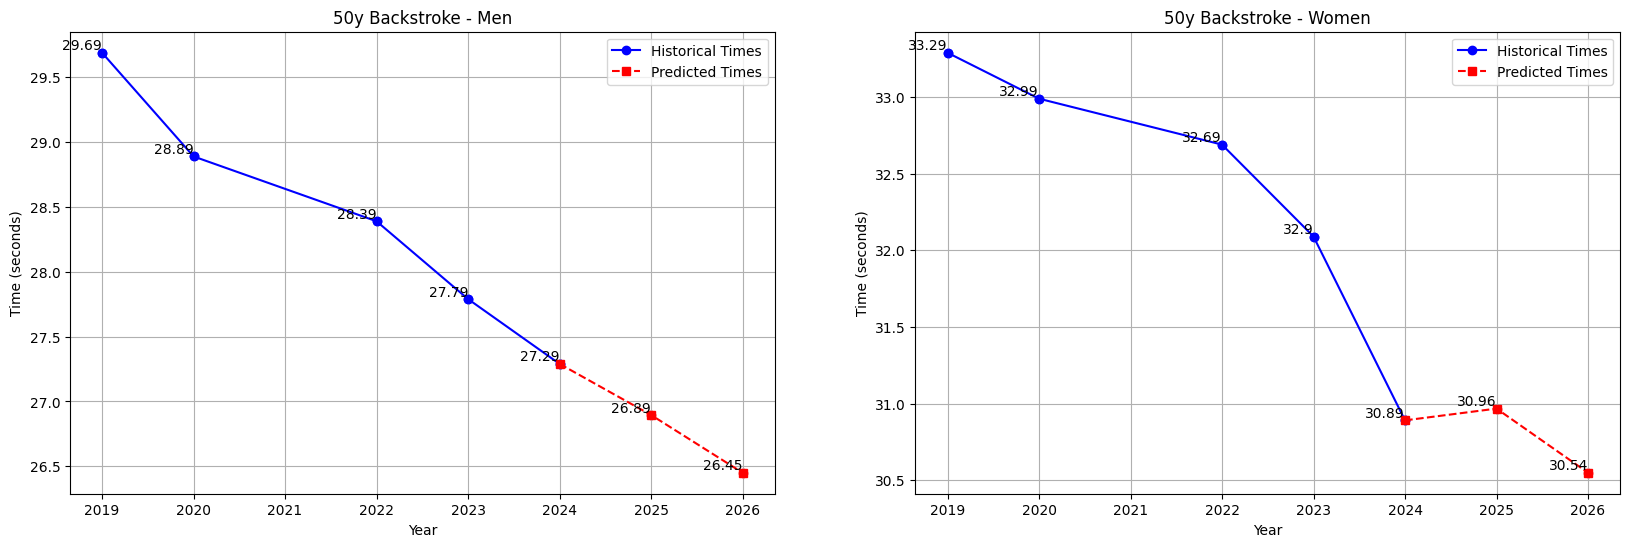

In [21]:
event_name = "50y Backstroke"
predicted_times_dict = predict_and_plot(event_name, men_50_back, women_50_back)

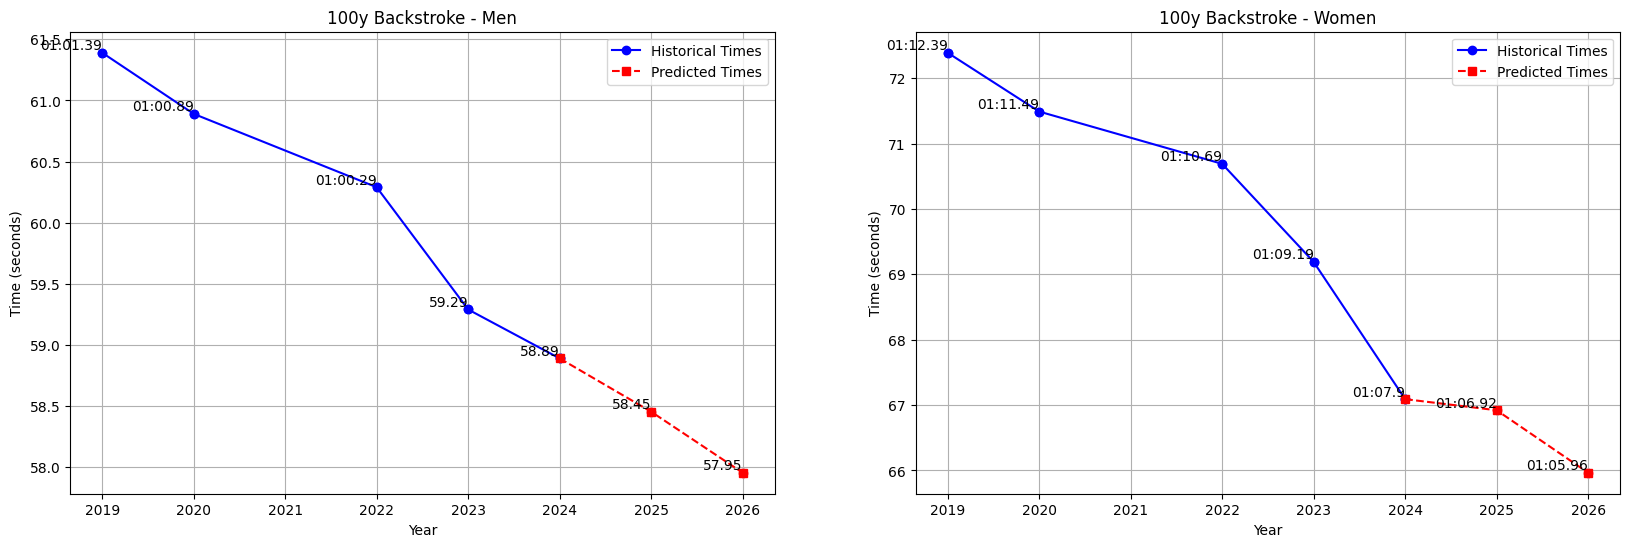

In [22]:
event_name = "100y Backstroke"
predicted_times_dict = predict_and_plot(event_name, men_100_back, women_100_back)

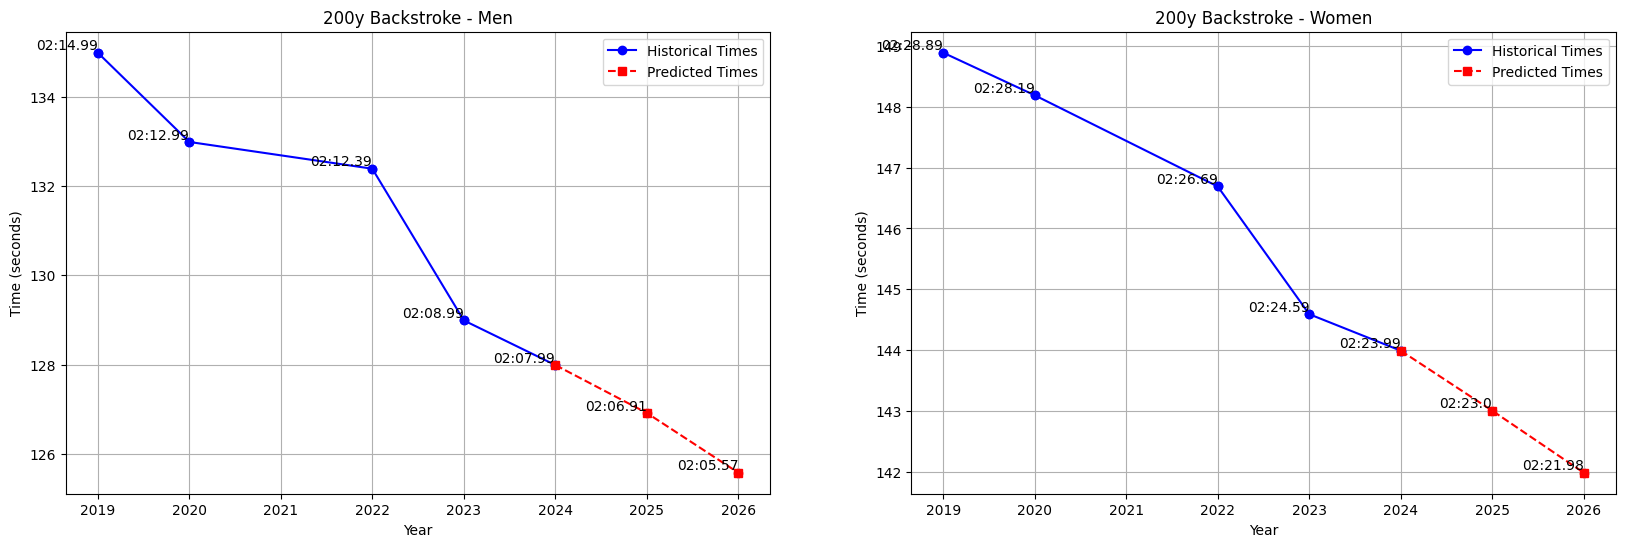

In [23]:
event_name = "200y Backstroke"
predicted_times_dict = predict_and_plot(event_name, men_200_back, women_200_back)

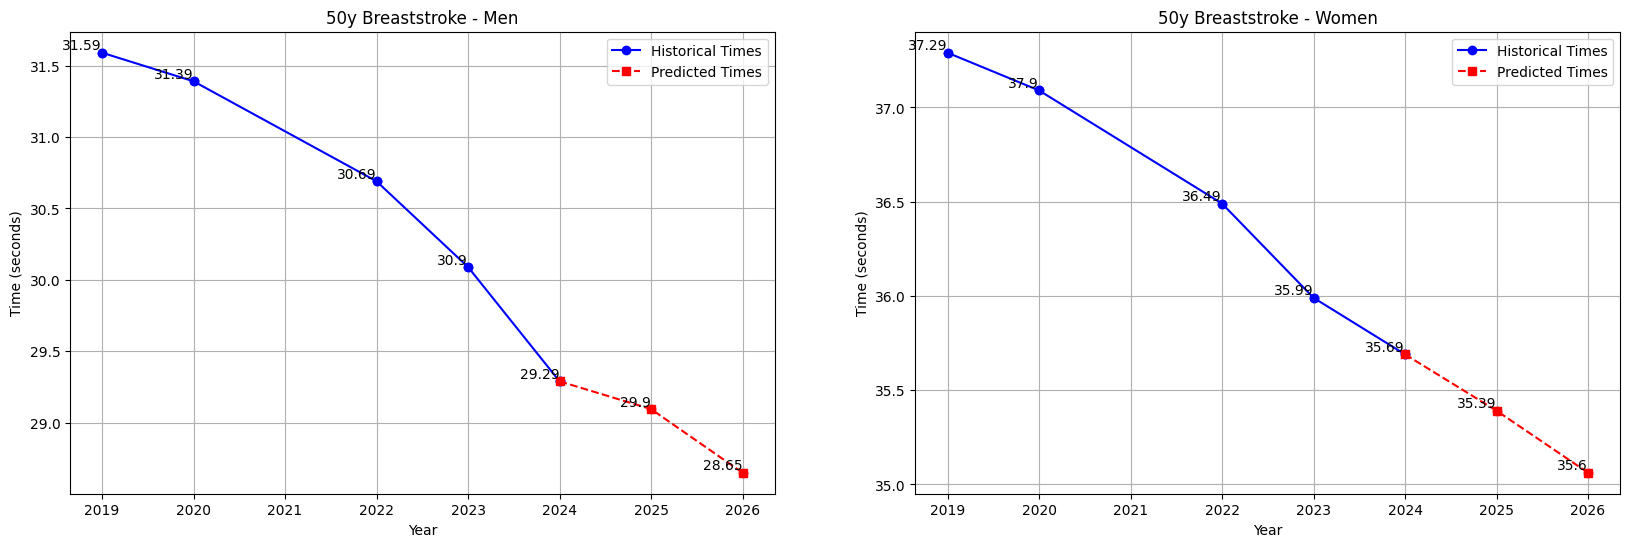

In [24]:
event_name = "50y Breaststroke"
predicted_times_dict = predict_and_plot(event_name, men_50_breast, women_50_breast)

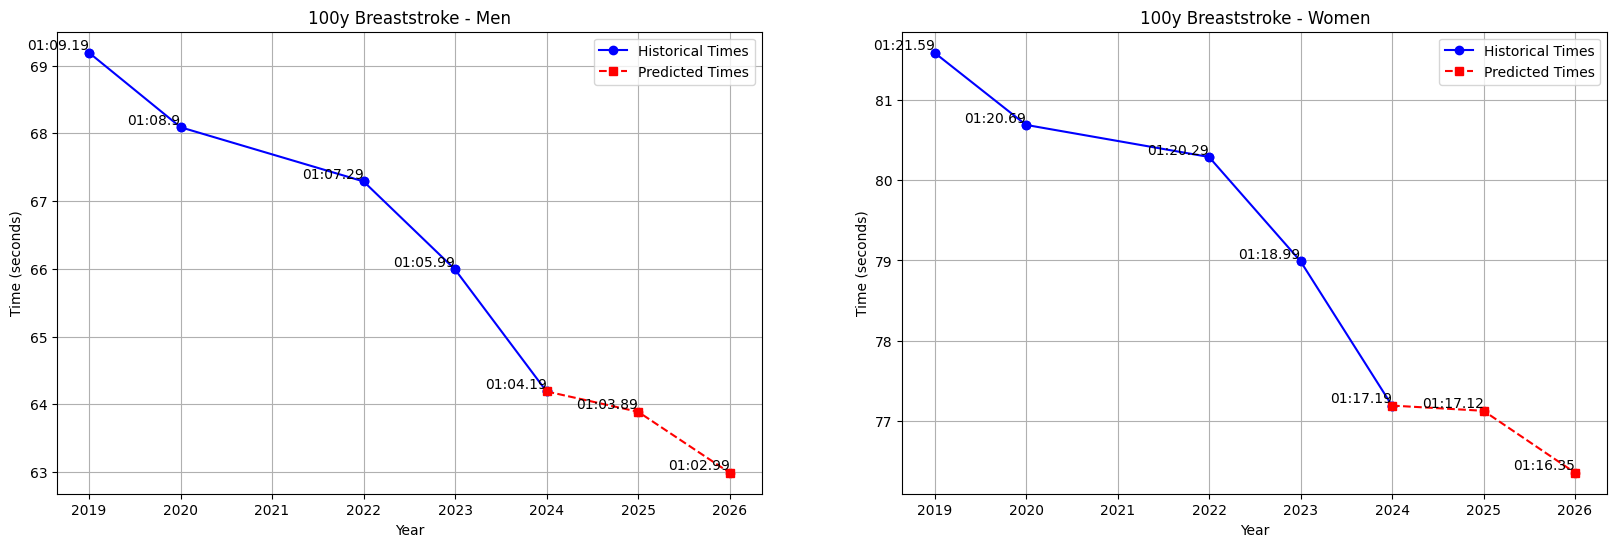

In [25]:
event_name = "100y Breaststroke"
predicted_times_dict = predict_and_plot(event_name, men_100_breast, women_100_breast)

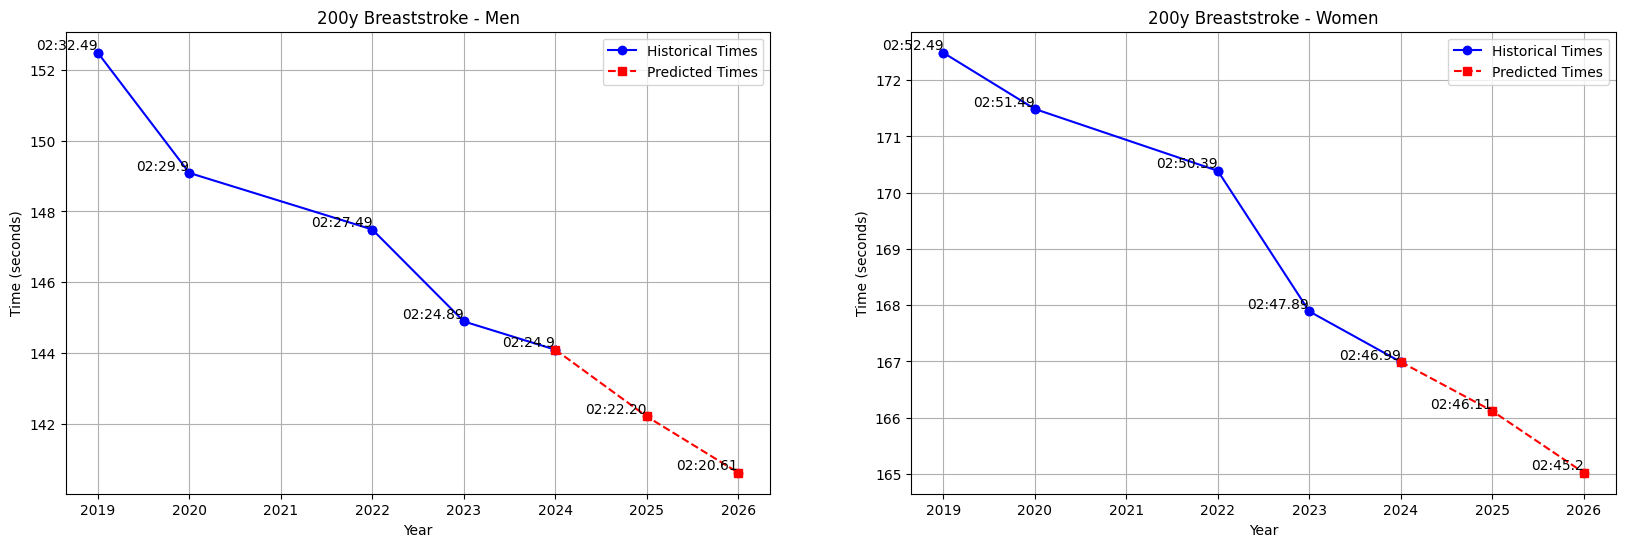

In [26]:
event_name = "200y Breaststroke"
predicted_times_dict = predict_and_plot(event_name, men_200_breast, women_200_breast)

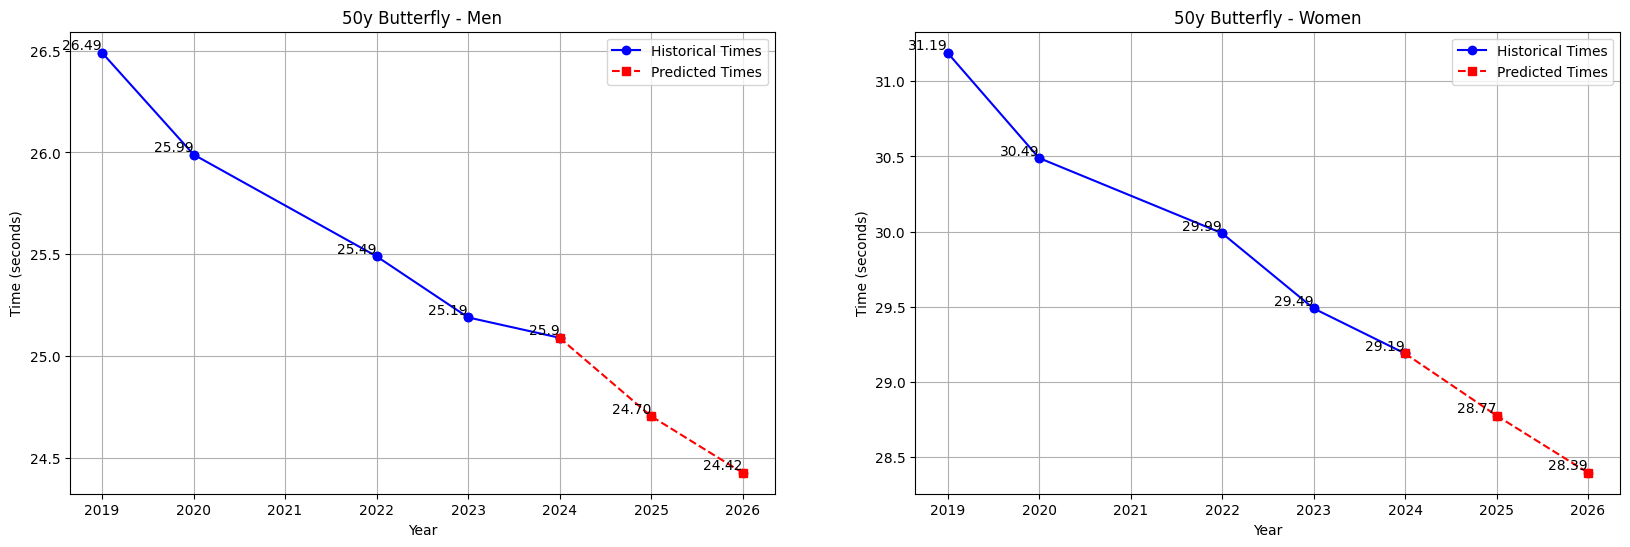

In [27]:
event_name = "50y Butterfly"
predicted_times_dict = predict_and_plot(event_name, men_50_fly, women_50_fly)

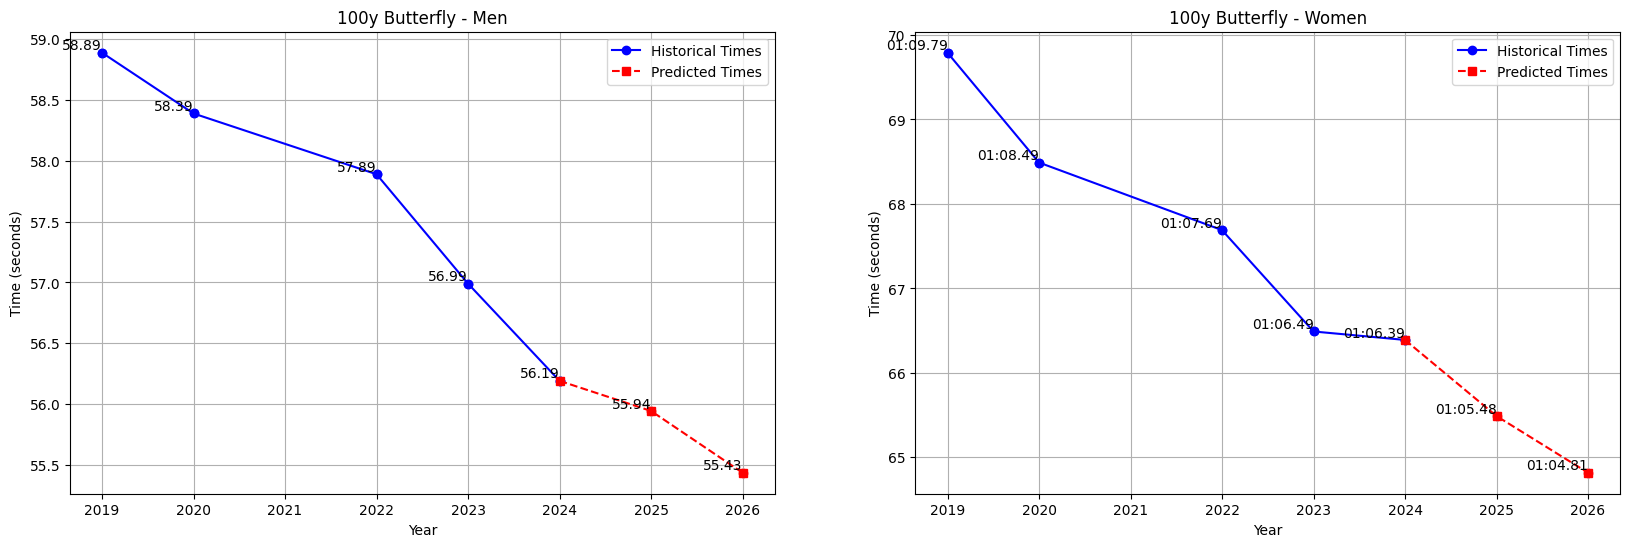

In [28]:
event_name = "100y Butterfly"
predicted_times_dict = predict_and_plot(event_name, men_100_fly, women_100_fly)

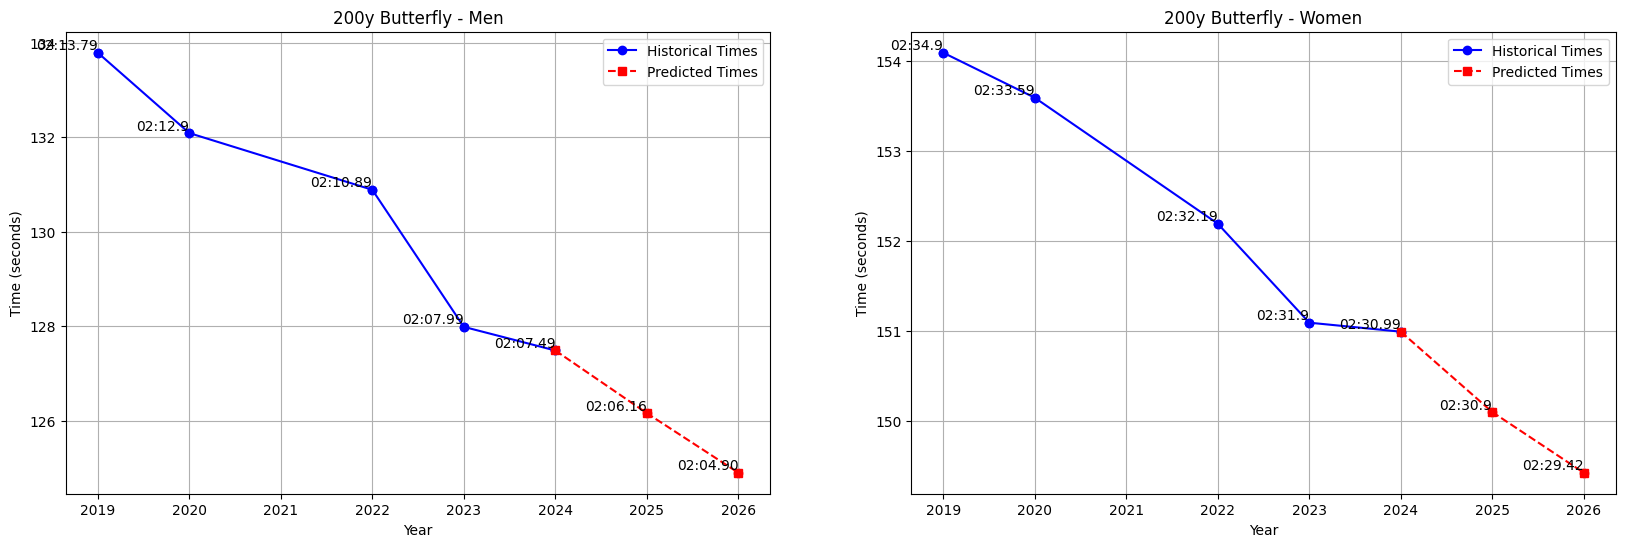

In [29]:
event_name = "200y Butterfly"
predicted_times_dict = predict_and_plot(event_name, men_200_fly, women_200_fly)

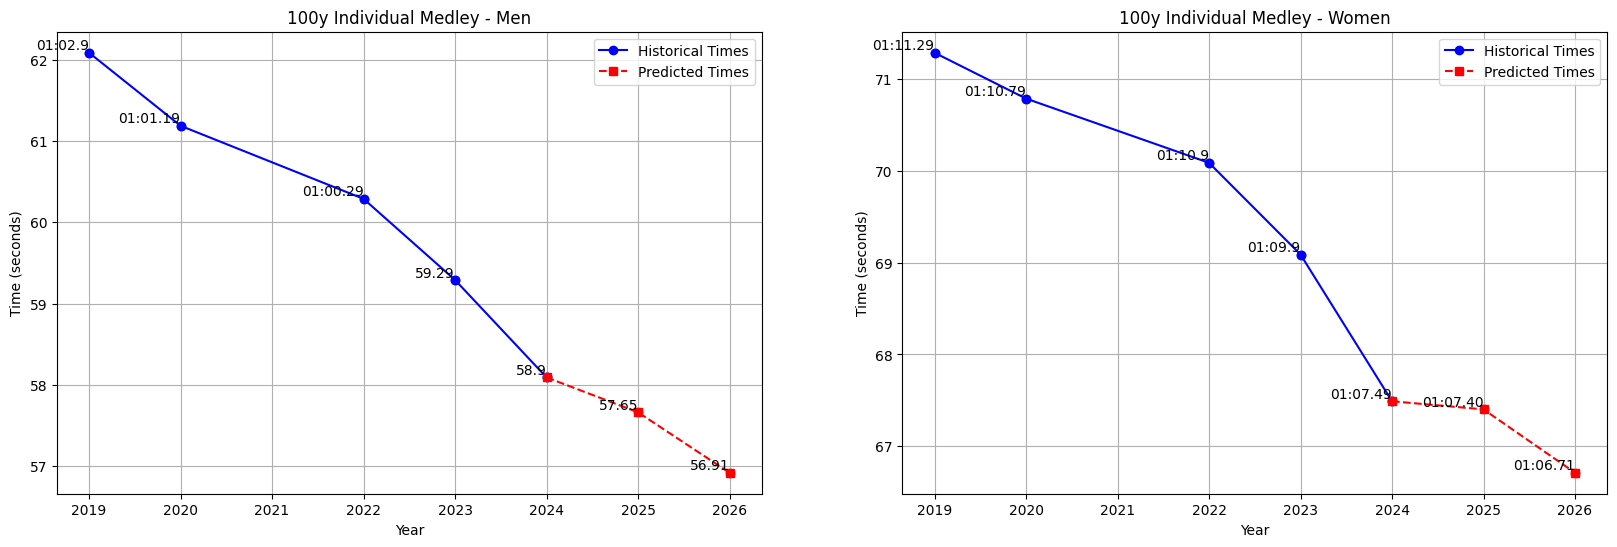

In [30]:
event_name = "100y Individual Medley"
predicted_times_dict = predict_and_plot(event_name, men_100_im, women_100_im)

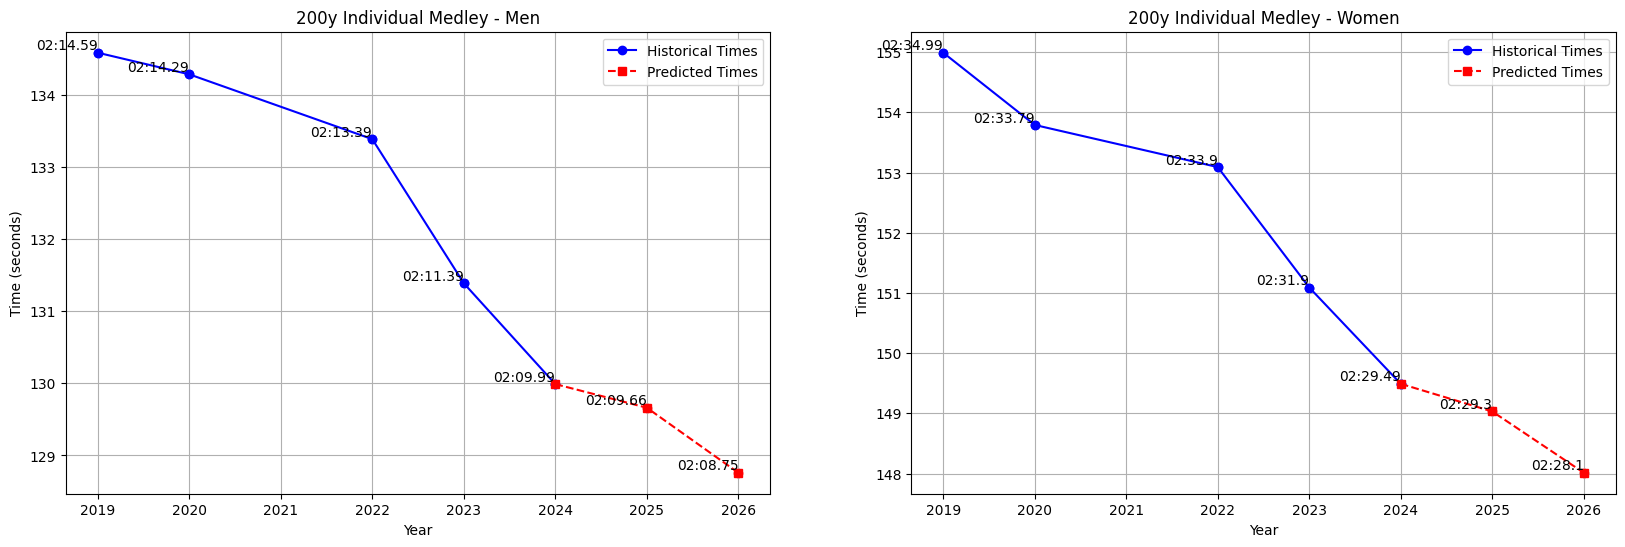

In [31]:
event_name = "200y Individual Medley"
predicted_times_dict = predict_and_plot(event_name, men_200_im, women_200_im)

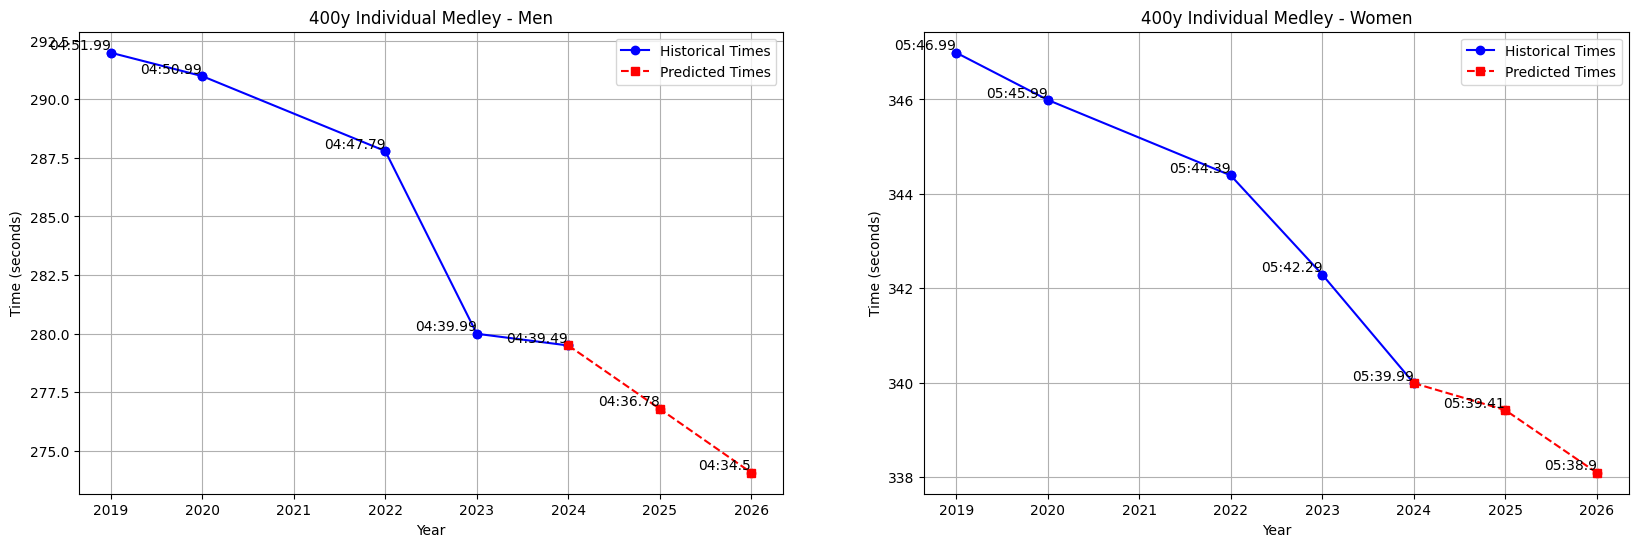

In [32]:
event_name = "400y Individual Medley"
predicted_times_dict = predict_and_plot(event_name, men_400_im, women_400_im)